In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct

In [54]:
h= 320
w= 360

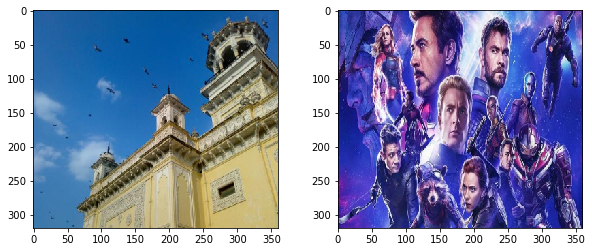

In [59]:
img= cv2.resize(cv2.imread('test.jpg'),(w,h))/255.0
img2= cv2.resize(cv2.imread('First.jpeg'),(w,h))/255.0

fig= plt.figure(figsize=(10,4))
ax1= fig.add_subplot(1,2,1)
ax1.imshow(img[:,:,::-1])

ax2= fig.add_subplot(1,2,2)
ax2.imshow(img2[:,:,::-1])


In [60]:
mat=0.5*np.matrix([[1,1,1,1],[1,-1,1,-1],[1,1,-1,-1],[1,-1,-1,1]])

In [61]:
def transform(arr):
    return mat*arr.reshape(-1,1)

In [62]:
transform(np.array([1,2,3,4]))

matrix([[ 5.],
        [-1.],
        [-2.],
        [ 0.]])

In [63]:
hidden= np.zeros((h,w,3))
alpha= 1e-3

In [64]:
for i in range(0,h,2):
    for j in range(0,w,2):
        for c in range(3):
            transformed= transform(np.array([img[i,j,c],img[i,j+1,c],img[i+1,j,c],img[i+1,j+1,c]]))
            hidden[i,j,c]= transformed[0] + alpha*img2[i,j,c]
            hidden[i,j+1,c]= transformed[1] + alpha*img2[i,j+1,c]
            hidden[i+1,j,c]= transformed[2] + alpha*img2[i+1,j,c]
            hidden[i+1,j+1,c]= transformed[3] + alpha*img2[i+1,j+1,c]
            
for i in range(0,h,2):
    for j in range(0,w,2):
        for c in range(3):
            tr= transform(np.array([hidden[i,j,c],hidden[i,j+1,c],hidden[i+1,j,c],hidden[i+1,j+1,c]]))
            hidden[i,j,c]= tr[0] 
            hidden[i,j+1,c]= tr[1]
            hidden[i+1,j,c]= tr[2] 
            hidden[i+1,j+1,c]= tr[3] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


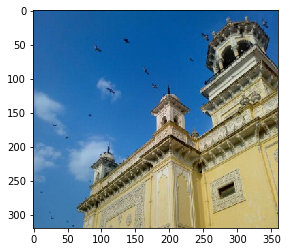

In [65]:
plt.imshow(hidden[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


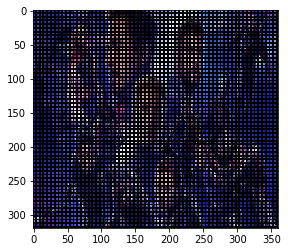

In [66]:
side=hidden-img
plt.imshow(side[:,:,::-1]/np.max(side))

In [67]:
rec= np.zeros_like(hidden)
rec.shape

(320, 360, 3)

In [68]:
for i in range(0,h,2):
    for j in range(0,w,2):
        for c in range(3):
            rec[i,j,c]= side[i,j,c]/alpha 
            rec[i,j+1,c]= side[i,j+1,c]/alpha
            rec[i+1,j,c]= side[i+1,j,c]/alpha
            rec[i+1,j+1,c]= side[i+1,j+1,c]/alpha
            
for i in range(0,h,2):
    for j in range(0,w,2):
        for c in range(3):
            tr= transform(np.array([rec[i,j,c],rec[i,j+1,c],rec[i+1,j,c],rec[i+1,j+1,c]]))
            rec[i,j,c]= tr[0] 
            rec[i,j+1,c]= tr[1]
            rec[i+1,j,c]= tr[2] 
            rec[i+1,j+1,c]= tr[3] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


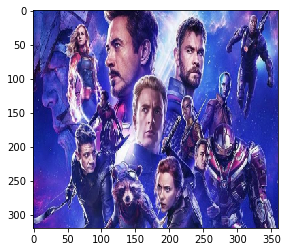

In [69]:
plt.imshow(rec[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


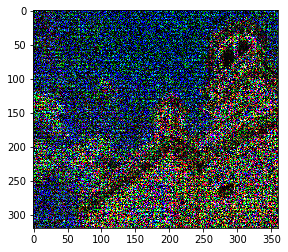

In [70]:
plt.imshow(5*(rec-img2)[:,:,::-1]/np.max(rec-img2))

In [71]:
RMSE= np.sqrt(np.sum(np.square(rec-img2)))
PSNR= 20*np.log10(255/RMSE)
print(PSNR)

258.33315239280955


In [72]:
print(np.max(rec-img2))

3.5188518765494337e-13


In [74]:
RMSE_2= np.sqrt(np.sum(np.square(side)))
PSNR_2= 20*np.log10(255/RMSE_2)
print(PSNR_2)

58.73102737923506
